In [1]:
# saves you having to use print as all exposed variables are printed in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

# matpolitlib config
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,4

# suppress warning message
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2

import ds_discovery
import ds_behavioral
print('DTU: {}'.format(ds_discovery.__version__))
print('DBU: {}'.format(ds_behavioral.__version__))

DTU: 2.03.077
DBU: 1.02.024


# Geeting Started with DTU Synthetic Behavioural Data Builder

## Package Structure
Within the Discovery Transitioning Utils are a set of`simulator package` that contains the DataBuilder, DataBuilderPropertyManager and the DataBuilderTools class

#### DataBuilder: 
- is a Data Builder management instance that allows the building of datasets to be repeatable by saving a configuration of the build definition

#### DataBuilderPropertyManager: 
- manages the configuration property values and saves the build templates to regenerate the synthetic data

#### DataBuilderTools: 
- is a set of static methods that generate the different data types `int`, `float`, `string`, `category` and `date`. and define the randomness and patterns of the values.


Firstly we need to import the `DataBuilder` class and create a **named** instance to identify this instance from other instances we might create. Normally the name would be representative of the dataset you are trying to create such as `customer`, `accounts` or `transactions` as an example

In [2]:
from ds_behavioral import DataBuilderTools

In [3]:
tools = DataBuilderTools()

## Building a basic dataset
with this example we will firstly look at the tools that are avaialbe and produce a `Pandas DataFrame` on the fly

In [4]:
tools

Here we can see the methods are broken down into four categories: `get`, `unique`, `correlate`, `associate`.

We can also look at the contextual help for each of the methods calling the `tools` property and using the `help` build-in

In [5]:
help(tools.get_number)

Help on function get_number in module ds_behavioral.generator.data_builder_tools:

get_number(from_value:[<class 'int'>, <class 'float'>], to_value:[<class 'int'>, <class 'float'>]=None, weight_pattern:list=None, offset:int=None, precision:int=None, currency:str=None, bounded_weighting:bool=True, at_most:int=None, dominant_values:[<class 'float'>, <class 'list'>]=None, dominant_percent:float=None, dominance_weighting:list=None, size:int=None, quantity:float=None, seed:int=None)
    returns a number in the range from_value to to_value. if only to_value given from_value is zero
    
    :param from_value: range from_value to_value if to_value is used else from 0 to from_value if to_value is None
    :param to_value: optional, (signed) integer to end from.
    :param weight_pattern: a weighting pattern or probability that does not have to add to 1
    :param precision: the precision of the returned number. if None then assumes int value else float
    :param offset: an offset multiplier, 

## Get Methods
From here we can now play with some of the `get` methods

In [6]:
# get an integer between 0 and 9
tools.get_number(10, size=5)

[8, 5, 8, 8, 8]

In [7]:
# get a float between -1 and 1, notice by passing an float it assumes the output to be a float
tools.get_number(from_value=-1.0, to_value=1.0, precision=3, size=5)

[0.464, 0.291, 0.403, 0.87, -0.655]

In [8]:
# get a currency by setting the 'currency' parameter to a currency symbol. 
# Note this returns a list of strings
tools.get_number(from_value=1000.0, to_value=2000.0, size=5, currency='$', precision=2)

['$1,752.83', '$1,511.50', '$1,161.20', '$1,934.25', '$1,437.74']

In [9]:
# get categories from a selection
tools.get_category(['Red', 'Blue', 'Green', 'Black', 'White'], size=5)

['Blue', 'Green', 'Blue', 'Blue', 'Green']

In [10]:
# we can manage the number of times a selection should be picked with 'at_most'
tools.get_category(['Red', 'Blue', 'Green', 'Black', 'White'], size=5, at_most=1)

['Red', 'Blue', 'Green', 'Black', 'White']

In [11]:
# get a timestamp between two dates
tools.get_datetime(start='01/01/2017', until='31/12/2018')

[Timestamp('2018-01-15 18:44:30.271148256')]

In [12]:
# tools a formated date string between two numbers
tools.get_datetime(start='01/01/2017', until='31/12/2018', size=4, date_format='%Y-%m-%d')

['2018-06-18', '2018-06-21', '2017-05-17', '2017-05-15']

In [13]:
# you can use most date formats, not just a string. Notice the optional 'day_first'. the defualt is True
start = pd.Timestamp('01/01/2007')
end = datetime.datetime.now()
tools.get_datetime(start=start, until=end, size=4, date_format='%d-%m-%Y %H:%M:%S', day_first=True)

['03-04-2017 10:06:09',
 '16-11-2009 08:29:12',
 '17-01-2014 06:53:40',
 '08-02-2008 06:34:25']

## Sample Data
There are also a number of sample categories and data that can be chocen from
- ProfileSamples
- CallCentreSample
- GeneralSamples
- MutualFundSamples
- BusinessSample

In [22]:
from ds_behavioral.sample.sample_data import CallCentreSamples

In [23]:
# as an example here is the set of profile samples
CallCentreSamples().__dir__()

['complaint', 'contact_type']

In [24]:
CallCentreSamples.complaint(4)

['Unhappy with delay',
 'My details are not accurate',
 'The performance of my product was poor',
 'You took too long']

### Building a DataFrame
With the data building blocks we can quickly build up a dataset

In [25]:
df = pd.DataFrame()
df['id'] = tools.unique_numbers(start=10, until=99, size=10)
df['age'] = tools.get_number(from_value=20, to_value=80, size=10)
df['start'] = tools.get_datetime(start='12/05/2018', until='30/11/2018', date_format='%d-%m-%Y', size=10)
df['dept'] = tools.get_category(selection=['Sales', 'Marketing', 'Finance', 'Product', 'Operations'], size=10)

### Data quantity
to show representative data we can adjust the quality of the data we produce. Here we only get about 50% of the telephone numbers

In [26]:
# using the get string pattern we can create part random and part static data elements. see the inline docs for help on customising choices
df['phone'] = tools.get_string_pattern("1-5dd-ddd-dddd", choice_only=False, size=10, quantity=0.5)
df

,id,age,start,dept,phone
0,65,68,26-05-2018,Product,
1,15,31,26-11-2018,Sales,1-551-559-6966
2,48,53,20-11-2018,Marketing,
3,58,27,08-10-2018,Finance,1-544-348-7051
4,12,75,03-10-2018,Sales,1-554-196-2949
5,73,74,03-11-2018,Product,1-585-108-1612
6,27,49,22-08-2018,Operations,1-571-041-5187
7,53,54,25-09-2018,Product,1-511-915-5667
8,46,51,05-07-2018,Sales,1-585-048-4989
9,39,65,09-06-2018,Operations,


## Synthetic Unstructured Data
using tags within a set of string text we are able to build sudo-unstructured data

in the follwing example we set up 2 template patterns then fill the tags with synthetic data

In [29]:
# The string patterns we would like to populate
templates = [
    "Hello <name>, your balance is <balance> on <date>",
    "<name> likes the phrase <phrase>"
]

# a dictionary of the tags and how they should be filled. Note we have used `get_custom` to use the built in sample data
tags = {
    '<name>'   : {'action': 'get_custom', 'kwargs': {'code_str': "ProfileSample.female_names()[0]"}},
    '<balance>': {'action': 'get_number', 'kwargs': {'from_value':10, 'to_value':1000, 'currency':'$', 'precision':2}},
    '<date>'   : {'action': 'get_datetime', 'kwargs': {'start':"12/01/2015", 'until':"31/12/2018", 'date_format':"%m-%d-%Y"}},
    '<phrase>' : {'action': 'get_custom', 'kwargs': {'code_str': "GenericSamples.phrases()[0]"}}    
}

In [30]:
# using the tagged pattern we create unstructured data. Note the weighting_pattern on the templates (see next section)
tools.get_tagged_pattern(pattern=templates, tags=tags, weight_pattern=[6,1], size=10)

SyntaxError: invalid syntax (<string>, line 1)

## Weighted Patterns 
Now we can get a bit more controlled in how we want the random numbers to be generated by using the weighted patterns. Weighted patterns are similar to probability but don't need to add to 1 and also don't need to be the same size as the selection. Lets see how this works through an example.

lets generate an array of 100 and then see how many times each category is selected

In [21]:
selection = ['M', 'F', 'U']
gender = tools.get_category(selection, weight_pattern=[5,4,1], size=100)

[55, 37, 8]


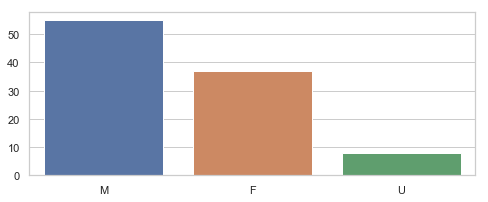

In [54]:
dist = [0]*3
for g in gender:
    dist[selection.index(g)] += 1
print(dist)
fig = plt.figure(figsize=(8,3))
sns.set(style="whitegrid")
g = sns.barplot(selection, dist)

It can also be used to create more complex distribution. In this example we want an age distribution that has peaks around 35-40 and 55-60 with a significant tail off after 60 but don't want a probability for every age.

In [55]:
# break the pattern into every 5 years
pattern = [3,5,6,10,6,5,7,15,5,2,1,0.5,0.2,0.1]
age = tools.get_number(20, 90, weight_pattern=pattern, size=1000)

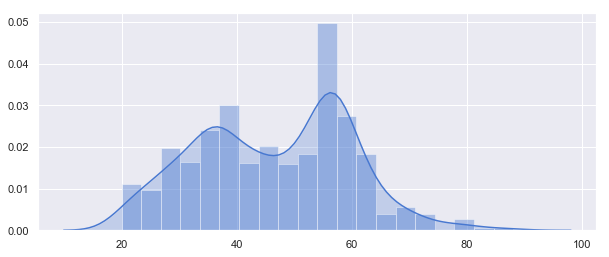

In [56]:
fig = plt.figure(figsize=(10,4))
sns.set(style="darkgrid", palette="muted", color_codes=True)
_ = sns.distplot(age, bins=20, kde_kws={"shade": True}, color="b")

### Complex Weighting patterns
Weighting patterns acn be multi dimensial representing controlling distribution over time.

In this example we don't want there to be any values below 50 in the first half then only values below 50 in the second

we can even build more complex numbering where we always get numbers around the middle but first 3rd and last 3rd additionally high and low numbersrespectively

#### weighting over time

In [61]:
from ds_discovery.transition.discovery import Visualisation as visual

## Dates
Dates are an important part of most datasets and need flexibility in all theri mutidimentional elements

In [64]:
# creating a set of randome dates and a set of unique dates
df = pd.DataFrame()
df['dates'] =  tools.get_datetime('01/01/2017', '31/01/2017', size=20, date_format='%d-%m-%Y')
df['seq'] = tools.unique_date_seq('01/01/2017', '31/01/2017', size=20, date_format='%d-%m-%Y')
print("{}/20 dates and {}/20 unique date sequence".format(df.dates.nunique(), df.seq.nunique()))


15/20 dates and 20/20 unique date sequence


### Date patterns
Get Data has a number of different weighting patterns that can be applied
- accross the daterange
- by year
- by month
- by weekday
- by hour
- by minutes

Or by a combination of any of them.

In [66]:
from ds_discovery.intent.pandas_cleaners import PandasCleaners as cleaner

In [67]:
# Create a month pattern that has no data in every other month
pattern = [1,0]*6
selection = ['Rigs', 'Office']

df_rota = pd.DataFrame()
df_rota['rota'] = tools.get_category(selection, size=300)
df_rota['dates'] =  tools.get_datetime('01/01/2017', '01/01/2018', size=300, month_pattern=pattern)

df_rota = cleaner.to_date_type(df_rota, headers='dates')
df_rota = cleaner.to_category_type(df_rota, headers='rota')

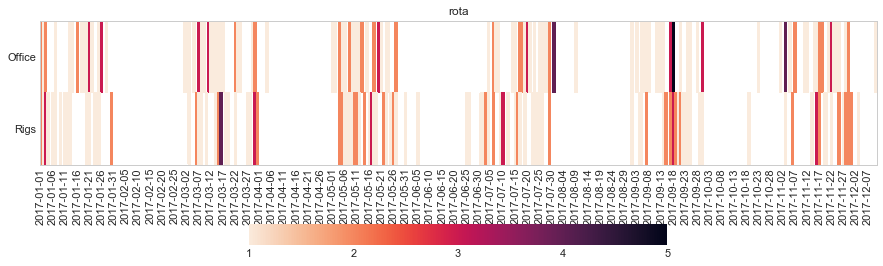

<Figure size 432x288 with 0 Axes>

In [68]:
visual.show_cat_time_index(df_rota, 'dates', 'rota')

Quite often dates need to have specific pattern to represent real working times, in this example we only want dates that occur in the working week.

In [69]:
# create dates that are only during the working week
pattern = [1,1,1,1,1,0,0]
selection = ['Management', 'Staff']

df_seating = pd.DataFrame()
df_seating['position'] = tools.get_category(selection, weight_pattern=[7,3], size=100)
df_seating['dates'] =  tools.get_datetime('14/01/2019', '22/01/2019', size=100, weekday_pattern=pattern)

df_seating = cleaner.to_date_type(df_seating, headers='dates')
df_seating = cleaner.to_category_type(df_seating, headers='position')

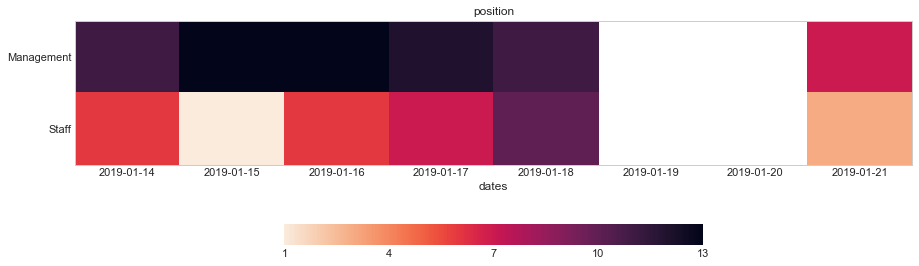

<Figure size 432x288 with 0 Axes>

In [70]:
visual.show_cat_time_index(df_seating, 'dates', 'position')

In [71]:

help(tools.get_datetime)

Help on function get_datetime in module ds_behavioral.generator.data_builder_tools:

get_datetime(start: Any, until: Any, default: Any = None, ordered: bool = None, date_pattern: list = None, year_pattern: list = None, month_pattern: list = None, weekday_pattern: list = None, hour_pattern: list = None, minute_pattern: list = None, quantity: float = None, date_format: str = None, size: int = None, seed: int = None, day_first: bool = True, year_first: bool = False)
    returns a random date between two date and times. weighted patterns can be applied to the overall date
    range, the year, month, day-of-week, hours and minutes to create a fully customised random set of dates.
    Note: If no patterns are set this will return a linearly random number between the range boundaries.
          Also if no patterns are set and a default date is given, that default date will be returnd each time
    
    :param start: the start boundary of the date range can be str, datetime, pd.datetime, pd.Ti